Status of number of misssing values before handling the missing values
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Status of number of misssing values after handling the missing values
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


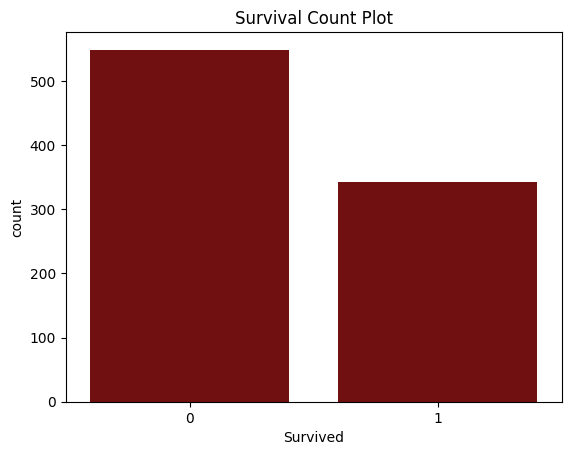

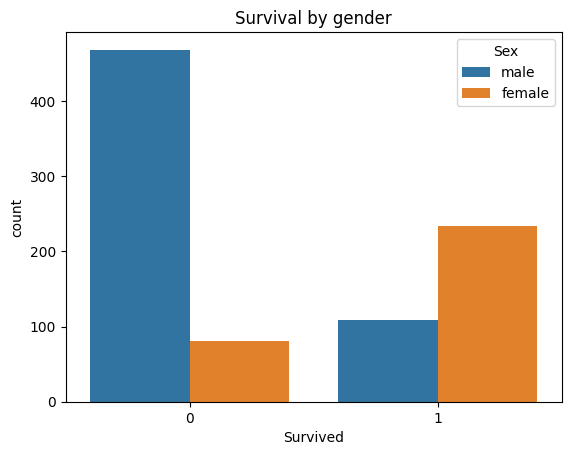

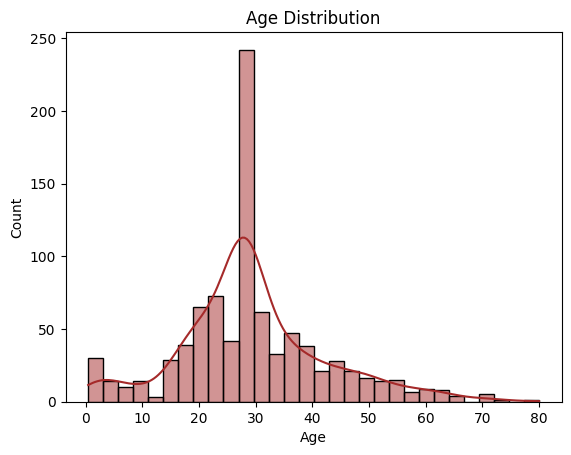

Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       105
           1       0.71      0.64      0.67        74

    accuracy                           0.74       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



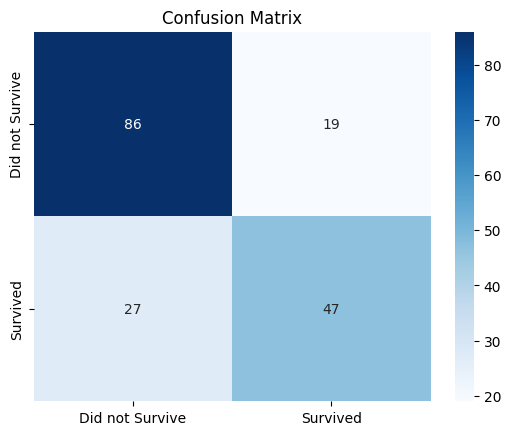

In [6]:
#Step 1 : import necessary librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Step 2 : Load the dataset
file_path = r"C:\Users\pm045\Desktop\Codesoft\Titanic-Dataset.csv"
df = pd.read_csv(file_path)
df.head()

#Step 3 : Data Exploration and cleaning
print("Status of number of misssing values before handling the missing values" )
x = df.isnull().sum()
print(x)


#now handling those missing values

#Step 3.1 : Age has 177 missing values --> replace those missing values with median using imputer
age_imputer = SimpleImputer(strategy="median")
df["Age"] = age_imputer.fit_transform(df[["Age"]])

#Step 3.2 : Embarked has 2 missing values --> replace those missing values with most frequently occured values
embarked_imputer = SimpleImputer(strategy="most_frequent")
df["Embarked"] = embarked_imputer.fit_transform(df[["Embarked"]]).ravel() # Use ravel() to flatten to 1D

#Step 3.3 : Cabin has 687 missing values --> to handle thode missing values if quite difficule --> drop the column Cabin is also a good solution
#Alternative Way : Fill the missing values with the placeholders like "unknown", etc.
#df.drop(columns=["Cabin"])
df['Cabin'] = df['Cabin'].fillna('Unknown')
a = df.isnull().sum()
print("\nStatus of number of misssing values after handling the missing values" )
print(a)
#Step 4 : Data Visualization

#Step 4.1
sns.countplot(x="Survived", data=df, color="maroon")
plt.title("Survival Count Plot")
plt.show()

#Step 4.2
sns.countplot(x = "Survived", hue="Sex",data=df)
plt.title("Survival by gender")
plt.show()

#Step 4.3
sns.histplot(df["Age"],kde=True,bins = 30,color="brown")
plt.title("Age Distribution")
plt.show()
#Step 5 : Feature Engineering and Encoding
# convert categorical features into numerical format
df["Sex"] = df["Sex"].map({"Male":0,"Female":1})

# One-hot encode 'Embarked' (categorical variable with 3 categories)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = df[features]

# Target variable: 'Survived'
y = df['Survived']

#Step 6 : Train-test Split
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Step 7 : Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)
#Step 8 : Model Evaluation
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Did not Survive', 'Survived'], yticklabels=['Did not Survive', 'Survived'])
plt.title('Confusion Matrix')
plt.show()

